<center><h1>Forest Fires Magnitude Prediction</h1></center>
<center>Batch 2</center>

## Introduction 
This notebook is based on an artificial intelligence model that attempts to estimate the magnitude of forest fires in a specific area. The dataset used in this project was obtained from Kaggle and includes a plethora of characteristics linked to forest fires impacting variables, such as X,Y coordinates of the chosen place i.e. Montesinho park, FFMC, area, rain, temperature, RH, wind, and so on. The following is a full description of the datasets ranges and columns.
a)s/forestfires.csv')p>


<h2>Dataset Explanation</h2>
Source: University of California Irvine Machine Learning Repository <br>
Link: http://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv <br>
this dataset has 13 attributes and 517 instances. The details of attributes are as follows: <br>
    1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9<br>
    2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9<br>
    3. month - month of the year: 'jan' to 'dec'<br>
    4. day - day of the week: 'mon' to 'sun'<br>
    5. FFMC (Fine Fuel Moisture Code) - FFMC index from the FWI system: 18.7 to 96.20<br>
    6. DMC (Duff Moisture Code) - DMC index from the FWI system: 1.1 to 291.3<br>
    7. DC (Drought Code) - DC index from the FWI system: 7.9 to 860.6<br>
    8. ISI (Initial Spread Index) - ISI index from the FWI system: 0.0 to 56.10<br>
    9. temp - temperature in Celsius degrees: 2.2 to 33.30<br>
    10. RH (Relative Humidity) - relative humidity in %: 15.0 to 100<br>
    11. wind - wind speed in km/h: 0.40 to 9.40<br>
    12. rain - outside rain in mm/m2 : 0.0 to 6.4<br>
    13. area - the burned area of the forest (in ha): 0.00 to 1090.84</p>

<h2>Goal</h2>
Developing a predictive model with machine learning approaches to comprehend and forecast the magnitude of forest fires based on environmental conditions is the main goal of this investigation. Our goal is to obtain an understanding of the correlations between temperature, humidity, wind speed, and other variables, and the resulting burned area measured in hectares, by utilizing the qualities that have been provided. By assisting authorities and stakeholders in making well-informed decisions to lessen the impact of forest fires in wooded areas, this information can be extremely valuable for fire prevention and management measures.

<h2>Code:</h2>

The header files that will be used in this project are listed below. Each library has its own distinct usage in the code. This will be discussed more in this document.

In [150]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import make_pipeline
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, mean_squared_error, roc_curve, auc
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [151]:
data = pd.read_csv('D:/Courses/PR/Project/forestfires.csv')
data.head(5)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


<h3>Pre-Processing</h3>

In preprocessing we basically remove the entire row if any NAN(Not A Number) or duplicate values are found in the dataset. Along with it we also convert any alphabetical values to numeric values so that it could be easily processed by the algorithm.

In [152]:
data.dropna(inplace=True)
data.drop_duplicates(inplace=True)    

month_mapping = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}
day_mapping = {'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5, 'sat': 6, 'sun': 7}
    
data['month'] = data['month'].replace(month_mapping)
data['day'] = data['day'].replace(day_mapping)
    
data['ln(area+1)'] = np.log(data['area']+1)
data = data
data.head(5)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,ln(area+1)
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0.0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0.0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,0.0
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0.0


<h3>Visualization</h3>

In this stage, we will do several visualizations on the dataset by picking any two or more columns and looking for any interesting links between them. On various columns of the dataset, we were able to plot a number of histograms, scatterplots, violin plots, lineplots, and so on. The plots are coded as follows, and the graphs are displayed below.

<h4>Histogram</h4>

Below we have plotted a set of histograms with Count on Y-axis and the other columns from the dataset which affect the area of forest fire prediction. Each of the below graphs are unique in their own way. We have also plotted kernel density estimate (KDE) curve for smoother representation of estimating the probability density function of a continuous random variable.

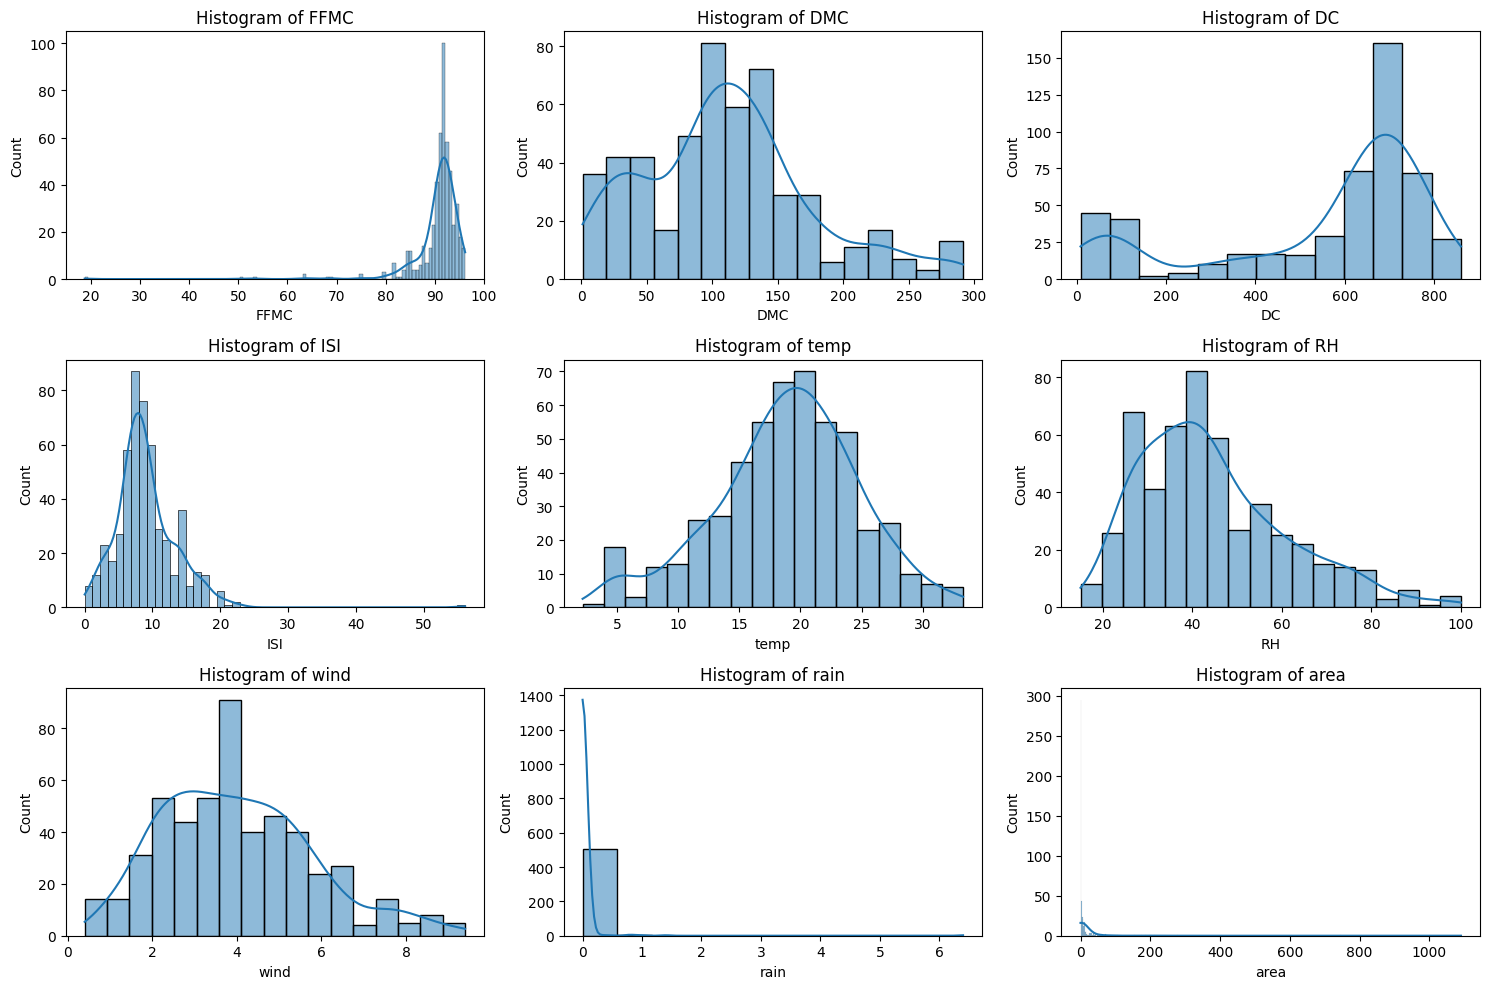

In [153]:
numeric_variables = ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']    
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
for i, var in enumerate(numeric_variables):
    sns.histplot(data[var], kde=True, ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f'Histogram of {var}')    
plt.tight_layout()
plt.show()

<h4>Scatter Plot</h4>

In this scatter plot we see a set of points depicting a graph between Relative Humidity and temperature, each plot contains a wind aspect also showing the speed of wind. As you can see in the plot whenever the RH is high, temp will be least and vice versa. Hence through this plot we can say that RH is inversely proportional to Temp.

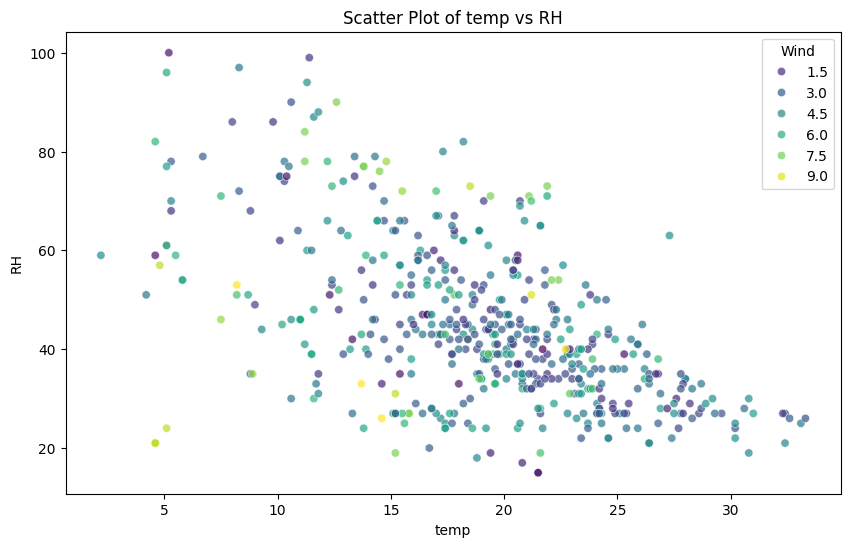

In [154]:
variable1 = 'temp'
variable2 = 'RH'    
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data[variable1], y=data[variable2], hue=data['wind'], palette='viridis', alpha=0.7)
plt.title(f'Scatter Plot of {variable1} vs {variable2}')
plt.xlabel(variable1)
plt.ylabel(variable2)
plt.legend(title='Wind', loc='upper right')
plt.show()

<h4>Violin Plot</h4>

This plot depicts a graph between Temp and Wind.

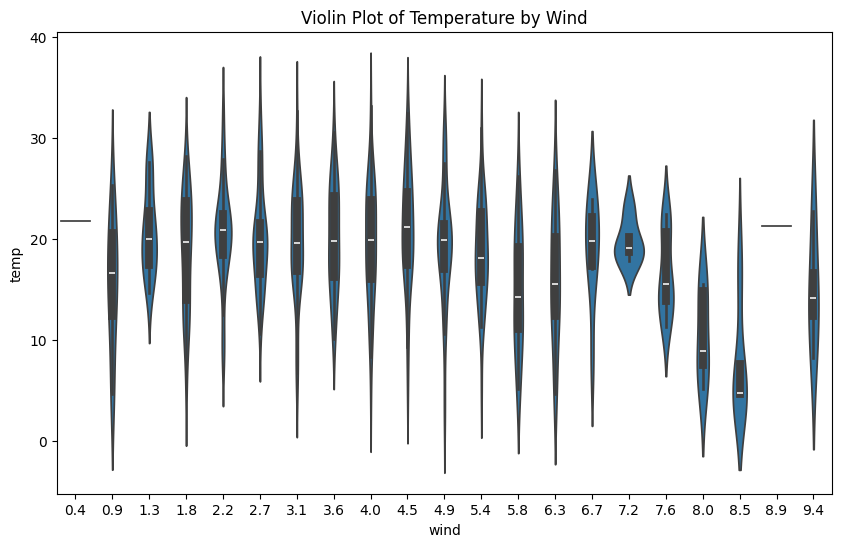

In [155]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='wind', y='temp', data=data)
plt.title('Violin Plot of Temperature by Wind')
plt.show()    

<h4>Swarm Plot</h4>

This swarmplot is between Temp and months, with the help of this visualization we can predict that the most number of fires occur in the months of August and September.

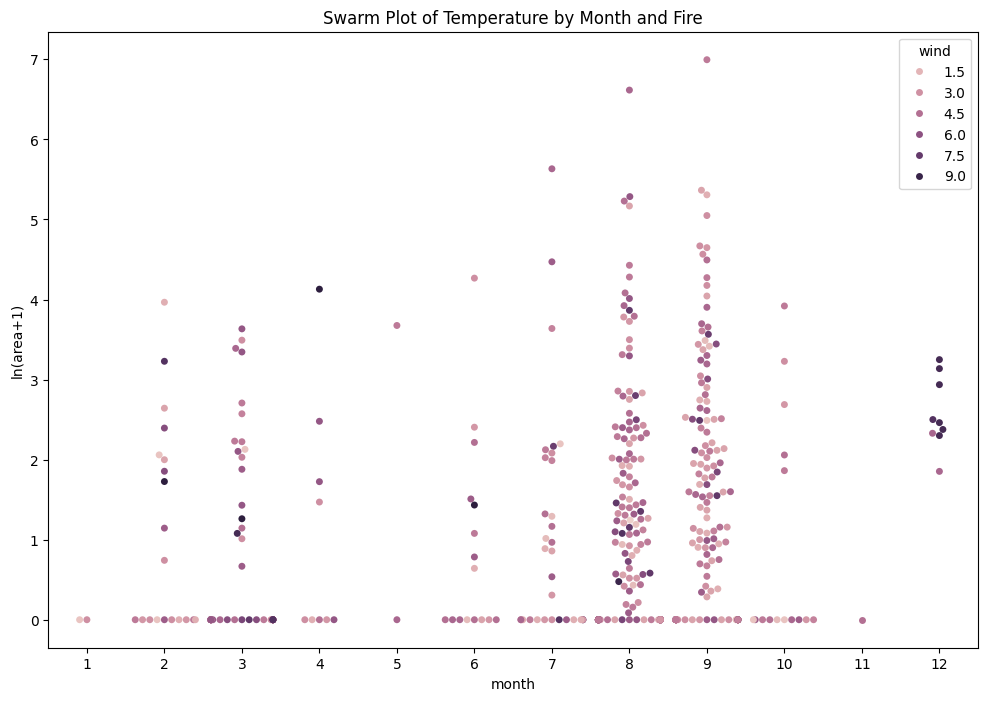

In [156]:
plt.figure(figsize=(12, 8))
sns.swarmplot(x='month', y='ln(area+1)', hue='wind', data=data)
plt.title('Swarm Plot of Temperature by Month and Fire')
plt.show()

<h4>Count Plot of Forest Fires</h4>

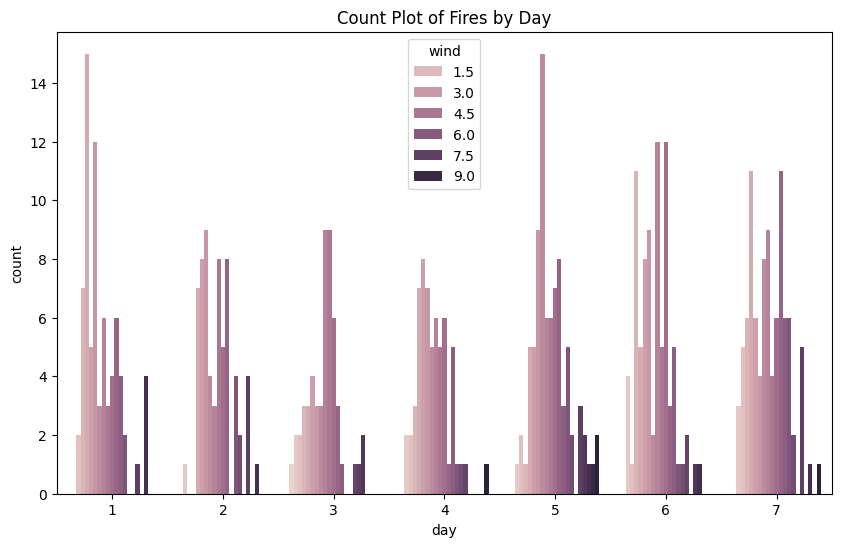

In [157]:
plt.figure(figsize=(10, 6))
sns.countplot(x='day', hue='wind', data=data)
plt.title('Count Plot of Fires by Day')
plt.show()

<h4>Pair Grid Plot</h4>

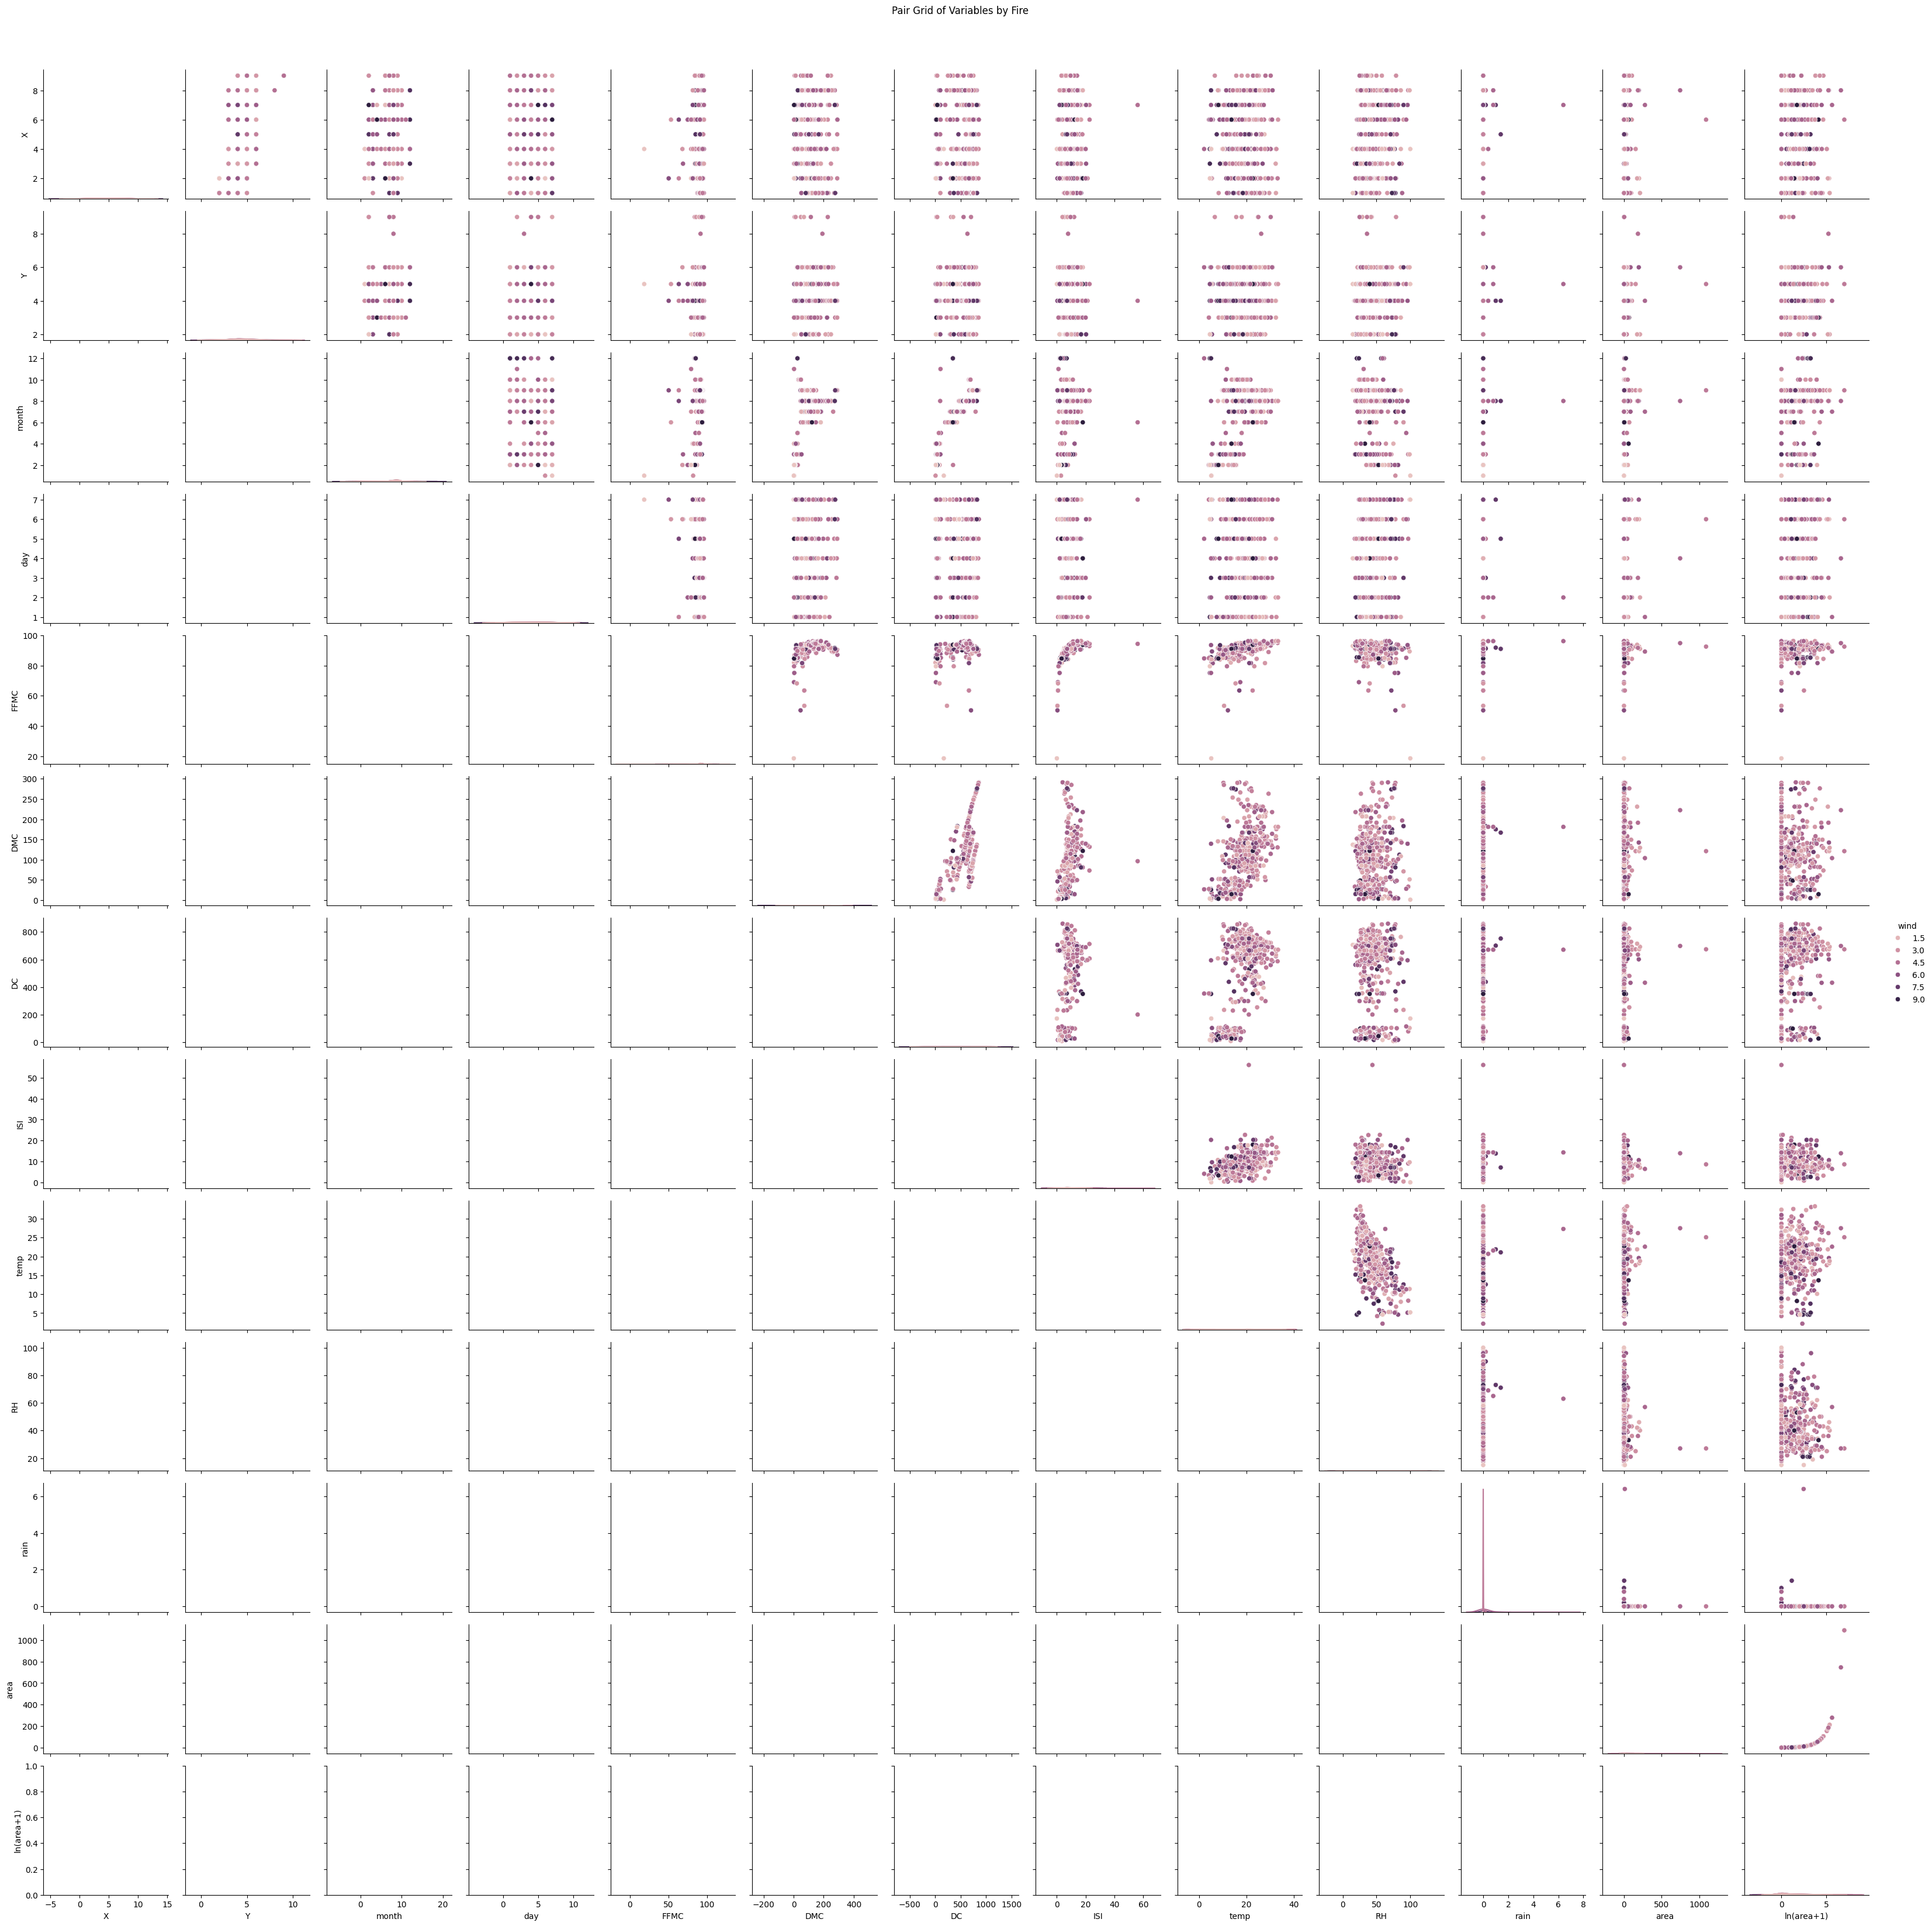

In [158]:
pair_grid = sns.PairGrid(data, hue='wind')
pair_grid.map_upper(sns.scatterplot)
pair_grid.map_diag(sns.kdeplot)
pair_grid.add_legend()
plt.suptitle('Pair Grid of Variables by Fire', y=1.02)
plt.show()

<h4>Line Plot</h4>

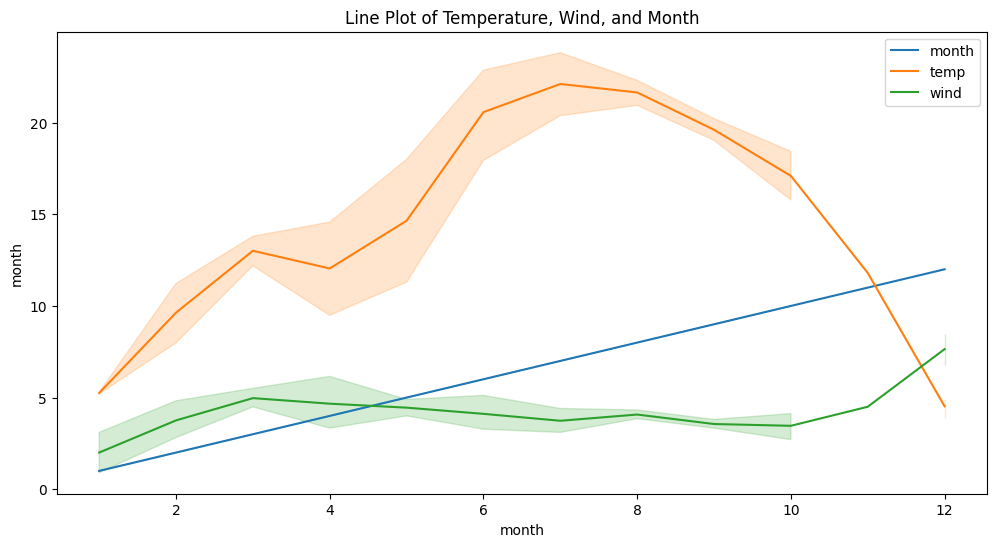

In [159]:
time_related_variables = ['month', 'temp', 'wind']
plt.figure(figsize=(12, 6))
for var in time_related_variables:
    sns.lineplot(x='month', y=var, data=data, label=var)
plt.title('Line Plot of Temperature, Wind, and Month')
plt.legend()
plt.show()

<h4>Scatter Matrix Plot</h4>

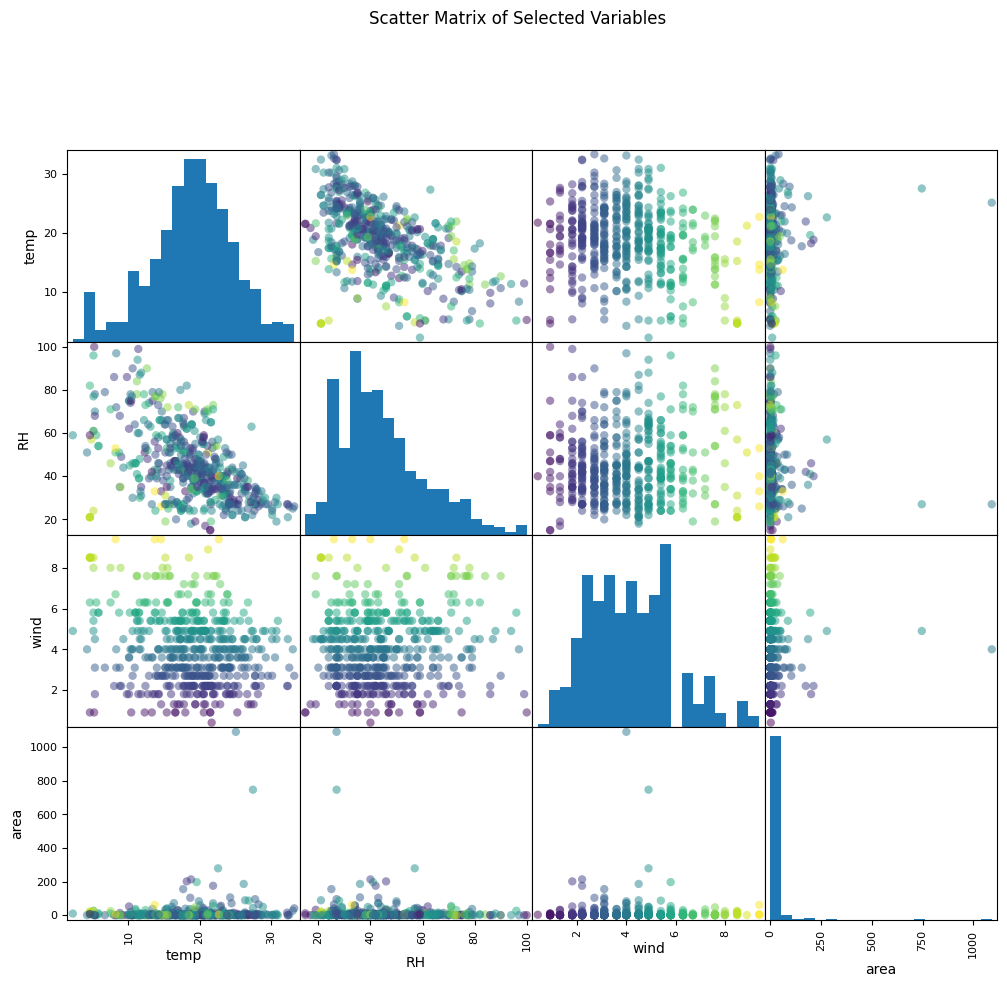

In [160]:
selected_variables = ['temp', 'RH', 'wind', 'area']
scatter_matrix = pd.plotting.scatter_matrix(data[selected_variables], c=data['wind'], figsize=(12, 10), marker='o', hist_kwds={'bins': 20})
plt.suptitle('Scatter Matrix of Selected Variables', y=1.02)
plt.show()

<h4>Kernel density estimate (KDE) Plot</h4>

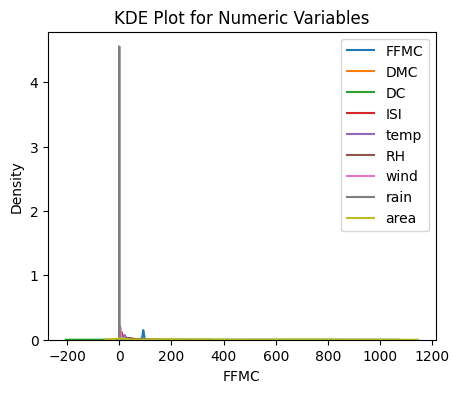

In [161]:
numeric_variables = ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']
plt.figure(figsize=(5, 4))
for var in numeric_variables:
    sns.kdeplot(data[var], label=var)
plt.title('KDE Plot for Numeric Variables')
plt.legend()
plt.show()

<h4>Joint Plot</h4>

<Figure size 1000x600 with 0 Axes>

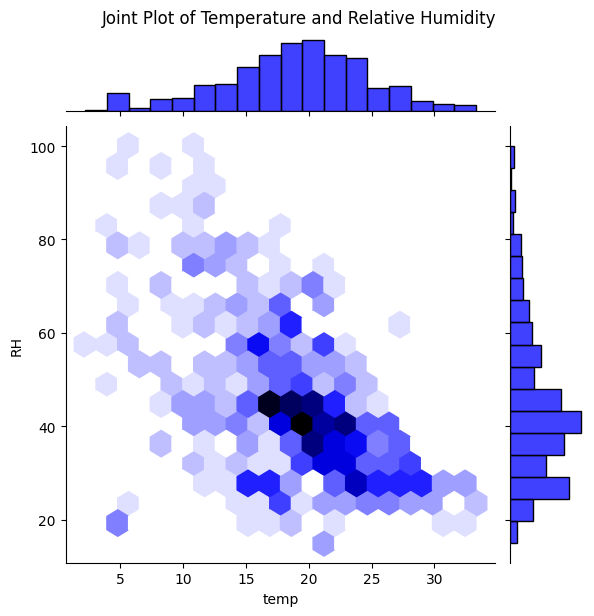

In [162]:
plt.figure(figsize=(10, 6))
sns.jointplot(x='temp', y='RH', data=data, kind='hex', color='blue')
plt.suptitle('Joint Plot of Temperature and Relative Humidity', y=1.02)
plt.show()

<h4>Bar Plot with Error Bars</h4>

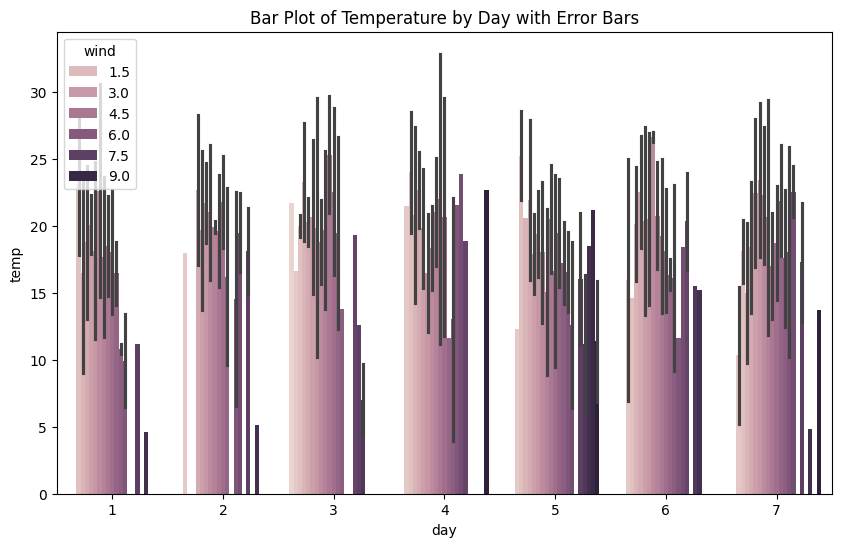

In [163]:
plt.figure(figsize=(10, 6))
sns.barplot(x='day', y='temp', hue='wind', data=data, ci='sd')
plt.title('Bar Plot of Temperature by Day with Error Bars')
plt.show()

<h4>Stacked Bar Plot</h4>

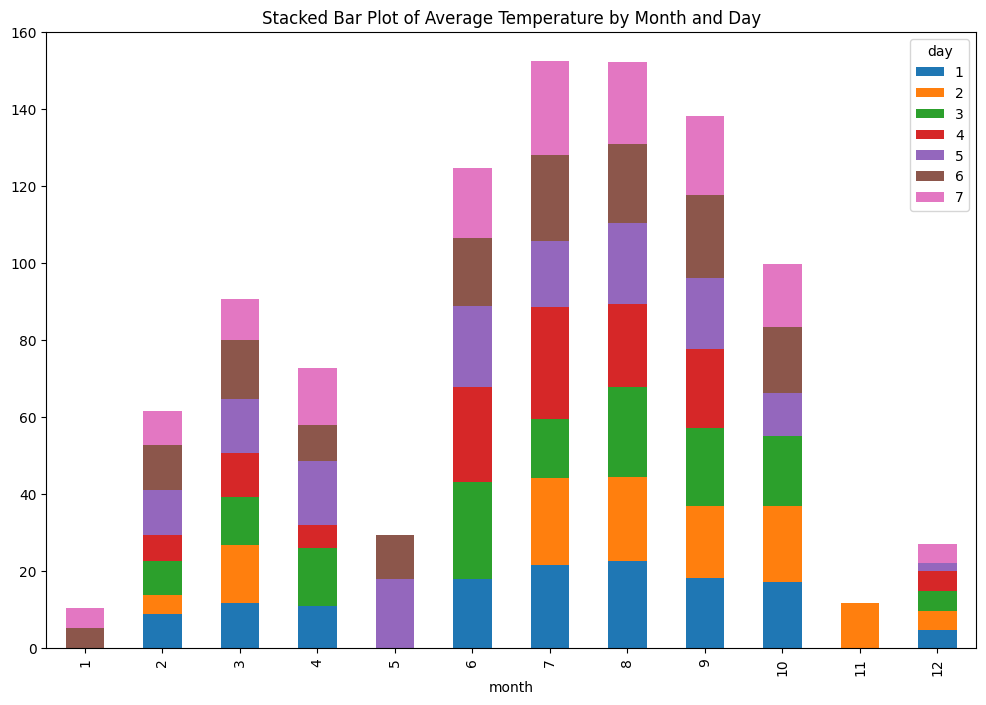

In [164]:
stacked_data = data.groupby(['month', 'day'])['temp'].mean().unstack()
stacked_data.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Stacked Bar Plot of Average Temperature by Month and Day')
plt.show()

<h4>Correlation Matrix</h4>

With the help of this correlational matrix we can know which features are more closely related to the other features. The boxes which are indicated in red shows that the two columns are more closely related to each other.

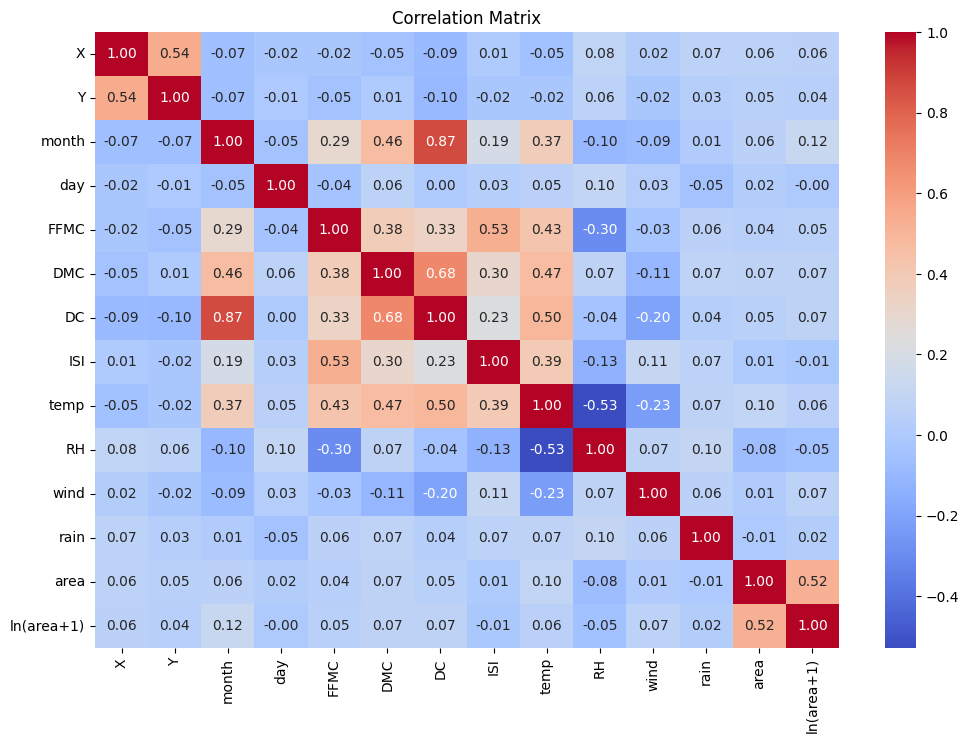

In [165]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

<h2>Feature Engineering</h2>

In this step we apply feature engineering to the dataset. We show the features with its importance percentage. We also add some more features such as DMC_DC_Ratio, etc. Which tend to increase the overall accuracy of the code by 2%.

In [166]:
data['Target'] = data['ln(area+1)'].apply(lambda x: 1 if x > 0 else 0)

selected_features = ['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']

missing_features = set(selected_features) - set(data.columns)
if missing_features:
    raise KeyError(f"Columns {missing_features} not found in the dataset.")

features = data[selected_features]

poly = PolynomialFeatures(degree=2, include_bias=False)
features_poly = poly.fit_transform(features)
features_poly_df = pd.DataFrame(features_poly, columns=poly.get_feature_names_out(features.columns))

features_poly_df['DMC_DC_Ratio'] = features_poly_df['DMC'] / features_poly_df['DC']

x_train, x_test, y_train, y_test = train_test_split(
    features_poly_df, data['Target'], test_size=0.2, random_state=42, stratify=data['Target']
)

model = make_pipeline(StandardScaler(), MLPClassifier(random_state=42))

model.fit(x_train, y_train)

perm_importance = permutation_importance(model, x_test, y_test, n_repeats=30, random_state=42)

feature_importances = pd.DataFrame({'feature': x_test.columns, 'importance': perm_importance.importances_mean})
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

print("Permutation Feature Importances:")
print(feature_importances)

Permutation Feature Importances:
      feature  importance
26       Y RH    0.069256
62     wind^2    0.061165
17       X RH    0.057605
57  temp wind    0.054693
1           Y    0.054693
..        ...         ...
36  FFMC rain    0.003883
50      ISI^2    0.003236
49    DC rain    0.001942
32   FFMC ISI   -0.008091
39    DMC ISI   -0.010680

[66 rows x 2 columns]


<h2>PCA (Principal Component Analysis)</h2>

Principal component analysis (PCA) is a technique used for identification of a smaller number of uncorrelated variables known as principal components from a larger set of data. The technique is widely used to emphasize variation and capture strong patterns in a data set. We perform PCA as follows and you can also see a graph for Cumulative Explained Variance vs Number of Principal Components.

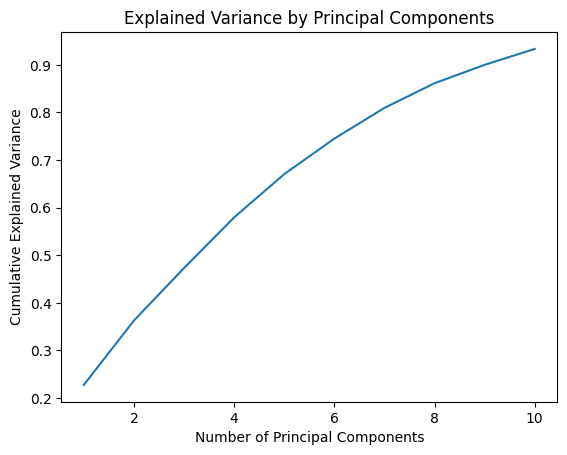

In [167]:
data['fire'] = np.where(data['ln(area+1)'] > 0, 1, 0)
Y = data['fire'].apply(lambda x: 1 if x > 0 else 0)
X = data.drop(['area', 'fire'], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.70, shuffle=True, random_state=0)

sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

X_train_pca_df = pd.DataFrame(X_train_pca, columns=[f'PC{i+1}' for i in range(X_train_pca.shape[1])])
X_test_pca_df = pd.DataFrame(X_test_pca, columns=[f'PC{i+1}' for i in range(X_test_pca.shape[1])])

explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, len(explained_variance) + 1), explained_variance)
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

<h2>Model Prediction</h2>

In this step we are using MLP Classifier (Multi-layer Perceptron classifier). We went forward with this model because earlier we used other highly used models like random forest classifier, XGBoost Classifier, etc but did not achieve the accuracy as we have using the MLP Classifier.

In [168]:
model = MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=1000)
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

<h2>Evaluation Metrics</h2>

To evaluate the model we have used the following metrics like accuracy, Confusion matrix, reports, ROC_AUC score, Mean squared error and also plotted an ROC Curve for visual analysis.

 Model Accuracy: 99.35064935064936
Confusion Matrix:
[[70  1]
 [ 0 83]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        71
           1       0.99      1.00      0.99        83

    accuracy                           0.99       154
   macro avg       0.99      0.99      0.99       154
weighted avg       0.99      0.99      0.99       154

ROC-AUC: 0.9929577464788732
Mean Squared Error: 0.006493506493506494


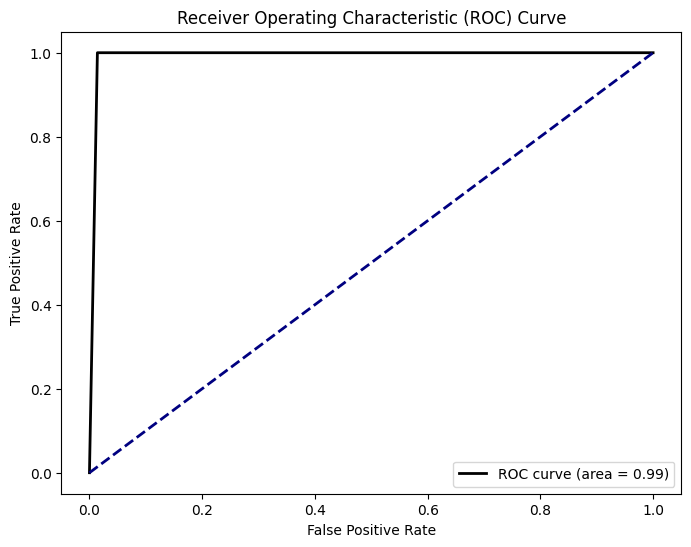

In [169]:
accuracy = accuracy_score(Y_test, Y_pred)
print(f' Model Accuracy: {accuracy*100}')

cm = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:")
print(cm)
    
print(classification_report(Y_test, Y_pred))

roc_auc = roc_auc_score(Y_test, Y_pred)
print(f'ROC-AUC: {roc_auc}')

mse = mean_squared_error(Y_test, Y_pred)
print(f'Mean Squared Error: {mse}')

fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)
roc_auc_curve = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='black', lw=2, label=f'ROC curve (area = {roc_auc_curve:.2f})')
    
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

<h2>Findings and Analysis</h2>

•	Spatial and Temporal Patterns: Spatial coordinates (X and Y) illuminate park layout, while month and day variables reveal temporal patterns. This allows exploration of whether specific areas or times exhibit a higher propensity for forest fires.

•	 Environmental Factors:  FWI indices (FFMC, DMC, DC, ISI), along with temperature, humidity, wind speed, and rainfall, form a rich set of features. They provide insights into fuel and soil moisture, fire spread potential, and other critical factors influencing forest fire occurrence.

•	Burned Area (Target Variable): The target variable, "area," signifies the burned forest area during a fire event. Understanding this metric is pivotal for assessing the severity of forest fires.

•	Correlation Analysis: Exploring correlations between attributes uncovers relationships. Initial observations suggest potential correlations between high temperatures, low humidity, increased wind speed, and larger burned areas. A comprehensive correlation analysis can validate and unveil these p impacts on forest fires.


<h2>Further Analysis:</h2>

1. Feature Importance: Utilizing techniques like feature importance can pinpoint the most influential factors in predicting burned areas. This insight is crucial for prioritizing preventive measures.

2. Temporal Analysis: Examining variations in fire frequency and intensity across months and days provides valuable seasonal and weekly patterns. This analysis aids in resource allocation and preparedness planning.

3. Model Selection and Evaluation: Implementing machine learning models and assessing their performance metrics (MAE, RMSE) ensures accurate prediction of burned areas.

4. Outlier Detection: Identifying instances with unusual burned areas sheds light on exceptional fire events or successful containment strategies.

5. Geospatial Visualization: Mapping spatial coordinates with burned areas visually identifies fire hotspots. GIS tools enhance the creation of informative visualizations.

6. Impact of External Factors: Considering external factors like human activities and emergency response times enriches the model's predictive capabilities.

7. Temporal Trends Over Years: Analyzing temporal trends over multiple years reveals long-term patterns and changes in environmental conditions and burned areas.

8. Integration with Weather Data: Supplementing the dataset with external weather data improves model accuracy and provides a comprehensive understanding of weather impacts on forest fires.


<h2>Conclusion and Future Scope</h2>
By delving into these aspects, the analysis establishes a robust foundation for developing a predictive model. This model contributes to forest fire prevention and management, aiding authorities in making informed decisions to mitigate the impact of forest fires effectively.
<br><br>
We aim to improve the model by searching datasets for different locations globally and adding more features which could increase the prediction rate even when using other features which are note being used in this model. 